In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = "../model/keypoint_classifier/keypoint.csv"
model_save_path = '../model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '../model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd


# Read the dataset from the CSV file
data = pd.read_csv(dataset)

# Specify the target variable
balance_by = data.columns[0]

# Function to determine the sampling strategy
def sampling_strategy(X, y, n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

# Calculate the median count for balancing
n_samples = int(data[balance_by].value_counts().median())

# Balancing the data using RandomUnderSampler and RandomOverSampler
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy(data.drop(balance_by, axis=1), data[balance_by], n_samples, t='majority'))
X_under, y_under = under_sampler.fit_resample(data.drop(balance_by, axis=1), data[balance_by])

over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy(X_under, y_under, n_samples, t='minority'))
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

balanced_data = pd.DataFrame(X_bal)
balanced_data[balance_by] = y_bal

# Print class distribution before resampling
unique_classes_before, class_counts_before = np.unique(data[balance_by], return_counts=True)
print("Class distribution before resampling:")
for class_label, count in zip(unique_classes_before, class_counts_before):
    print(f"Class {class_label}: {count} instances")

# Print class distribution after resampling
unique_classes_after, class_counts_after = np.unique(balanced_data[balance_by], return_counts=True)
print("\nClass distribution after resampling:")
for class_label, count in zip(unique_classes_after, class_counts_after):
    print(f"Class {class_label}: {count} instances")


Class distribution before resampling:
Class 0: 555 instances
Class 1: 146 instances
Class 2: 194 instances
Class 3: 178 instances
Class 4: 116 instances
Class 5: 142 instances
Class 6: 116 instances
Class 7: 131 instances

Class distribution after resampling:
Class 0: 144 instances
Class 1: 144 instances
Class 2: 144 instances
Class 3: 144 instances
Class 4: 144 instances
Class 5: 144 instances
Class 6: 144 instances
Class 7: 144 instances


In [5]:
balanced_data.head()

,0.0,0.0.1,0.23605150214592274,-0.3776824034334764,0.30472103004291845,-0.630901287553648,0.3605150214592275,-0.8412017167381974,0.2832618025751073,-0.9957081545064378,...,-0.5150214592274678,-0.2017167381974249,-0.5793991416309013,0.11158798283261803,-0.6738197424892703.1,0.15450643776824036,-0.51931330472103,0.04721030042918455,-0.4592274678111588,0
0,0.0,0.0,0.230263,-0.289474,0.269737,-0.572368,0.322368,-0.782895,0.348684,-0.927632,...,-0.677632,-0.098684,-0.730263,0.269737,-0.894737,0.335526,-0.750000,0.263158,-0.644737,0
1,0.0,0.0,0.345455,-0.318182,0.581818,-0.540909,0.672727,-0.759091,0.504545,-0.777273,...,-0.372727,-0.359091,-0.477273,0.009091,-0.322727,0.040909,-0.227273,-0.063636,-0.259091,0
2,0.0,0.0,0.242647,-0.213235,0.338235,-0.507353,0.264706,-0.816176,0.154412,-1.000000,...,-0.654412,-0.117647,-0.683824,-0.205882,-0.808824,-0.242647,-0.698529,-0.227941,-0.617647,0
3,0.0,0.0,0.295455,-0.340909,0.414773,-0.596591,0.500000,-0.801136,0.414773,-0.926136,...,-0.545455,-0.159091,-0.613636,0.204545,-0.664773,0.227273,-0.505682,0.125000,-0.448864,0
4,0.0,0.0,-0.452703,0.040541,-0.777027,-0.087838,-0.959459,-0.277027,-1.000000,-0.432432,...,-0.331081,-0.155405,-0.587838,-0.337838,-0.702703,-0.297297,-0.513514,-0.189189,-0.405405,0


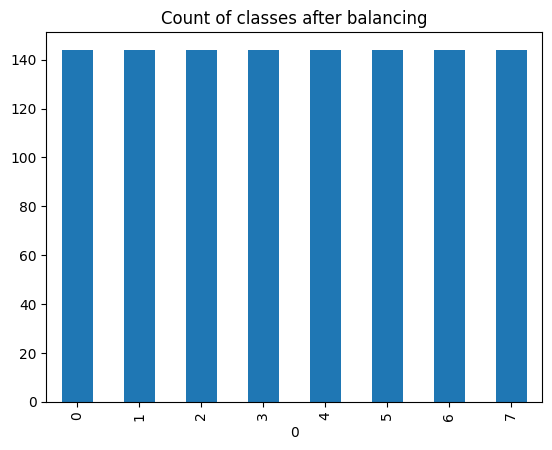

In [6]:
balanced_data["0"].value_counts().plot(kind='bar', title='Count of classes after balancing');

In [7]:
import pandas as pd
data = pd.read_csv(dataset)
data.head()

,0,0.0,0.0.1,0.23605150214592274,-0.3776824034334764,0.30472103004291845,-0.630901287553648,0.3605150214592275,-0.8412017167381974,0.2832618025751073,...,0.09012875536480687,-0.5150214592274678,-0.2017167381974249,-0.5793991416309013,0.11158798283261803,-0.6738197424892703.1,0.15450643776824036,-0.51931330472103,0.04721030042918455,-0.4592274678111588
0,0,0.0,0.0,0.328767,-0.305936,0.488584,-0.566210,0.589041,-0.776256,0.538813,...,0.237443,-0.488584,-0.077626,-0.621005,0.287671,-0.602740,0.287671,-0.461187,0.182648,-0.429224
1,0,0.0,0.0,0.387255,-0.269608,0.593137,-0.519608,0.740196,-0.725490,0.730392,...,0.343137,-0.455882,0.039216,-0.637255,0.426471,-0.553922,0.392157,-0.406863,0.274510,-0.392157
2,0,0.0,0.0,0.467742,-0.263441,0.715054,-0.494624,0.908602,-0.693548,0.930108,...,0.446237,-0.446237,0.172043,-0.650538,0.580645,-0.521505,0.505376,-0.360215,0.370968,-0.360215
3,0,0.0,0.0,0.463158,-0.231579,0.721053,-0.442105,0.931579,-0.605263,1.000000,...,0.489474,-0.347368,0.263158,-0.536842,0.642105,-0.394737,0.542105,-0.252632,0.405263,-0.257895
4,0,0.0,0.0,0.416268,-0.172249,0.684211,-0.330144,0.899522,-0.444976,1.000000,...,0.488038,-0.287081,0.287081,-0.454545,0.631579,-0.263158,0.521531,-0.167464,0.401914,-0.200957


In [8]:
X_dataset = np.array(data.drop("0", axis=1))
y_dataset = np.array(data["0"])

<Axes: xlabel='0'>

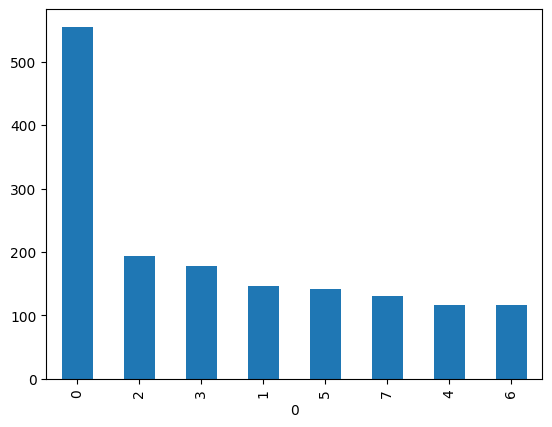

In [9]:
df_y = pd.DataFrame(y_dataset)
df_y[0].value_counts().plot(kind='bar')

In [10]:
X_balanced = np.array(balanced_data.drop(balance_by, axis=1))
X_balanced

array([[ 0.        ,  0.        ,  0.23026316, ..., -0.75      ,
         0.26315789, -0.64473684],
       [ 0.        ,  0.        ,  0.34545455, ..., -0.22727273,
        -0.06363636, -0.25909091],
       [ 0.        ,  0.        ,  0.24264706, ..., -0.69852941,
        -0.22794118, -0.61764706],
       ...,
       [ 0.        ,  0.        ,  0.07118644, ..., -0.45423729,
        -0.09152542, -0.36610169],
       [ 0.        ,  0.        , -0.13043478, ..., -0.36594203,
         0.00724638, -0.29710145],
       [ 0.        ,  0.        , -0.19661017, ..., -0.41016949,
        -0.2       , -0.3220339 ]])

In [11]:
y_balanced = np.array(balanced_data[balance_by])
y_balanced

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [13]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_balanced, y_balanced, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [15]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [17]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [18]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/10 [==>...........................] - ETA: 6s - loss: 2.3773 - accuracy: 0.1250
Epoch 1: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 1s 22ms/step - loss: 2.2682 - accuracy: 0.1217 - val_loss: 2.1559 - val_accuracy: 0.1797
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 2.1638 - accuracy: 0.1406
Epoch 2: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 5ms/step - loss: 2.1278 - accuracy: 0.1538 - val_loss: 2.0456 - val_accuracy: 0.2557
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 2.0821 - accuracy: 0.1719
Epoch 3: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 5ms/step - loss: 2.0571 - accuracy: 0.2020 - val_loss: 1.9689 - val_accuracy: 0.2734
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 2.0220 - accura

c:\FYPJ\AI_Model\Venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 5ms/step - loss: 1.9473 - accuracy: 0.2764 - val_loss: 1.8749 - val_accuracy: 0.3089
Epoch 6/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9483 - accuracy: 0.2344
Epoch 6: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 5ms/step - loss: 1.9066 - accuracy: 0.2849 - val_loss: 1.8374 - val_accuracy: 0.3468
Epoch 7/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.8866 - accuracy: 0.2891
Epoch 7: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 5ms/step - loss: 1.8651 - accuracy: 0.3035 - val_loss: 1.7996 - val_accuracy: 0.3519
Epoch 8/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9170 - accuracy: 0.2734
Epoch 8: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 5ms/step - loss: 1.8351 - accuracy: 0.3212 -

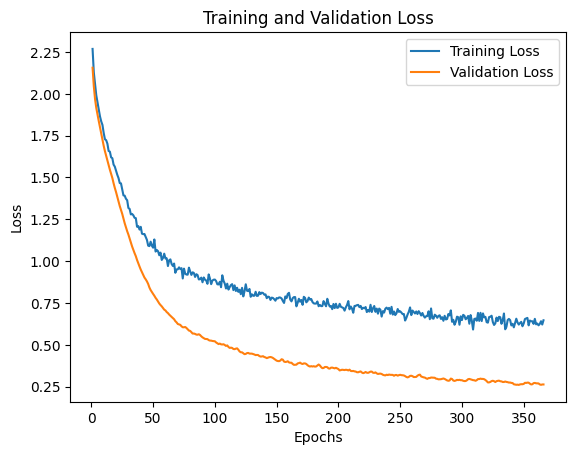

In [19]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

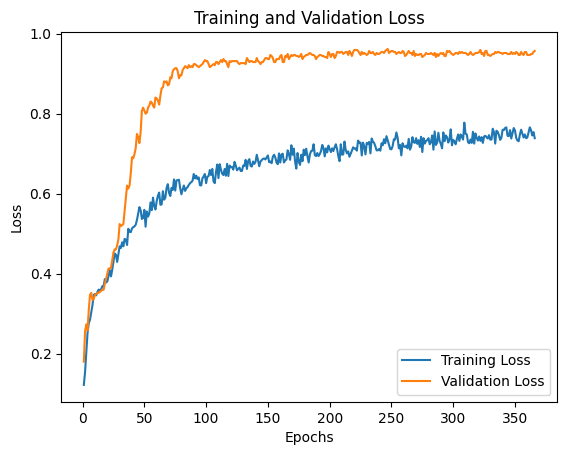

In [20]:
import matplotlib.pyplot as plt
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']

# Plotting the training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.fit(
    Xb_train,
    yb_train,
    epochs=1000,
    batch_size=128,
    validation_data=(Xb_test, yb_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7734
Epoch 1: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 12ms/step - loss: 0.6293 - accuracy: 0.7616 - val_loss: 0.2192 - val_accuracy: 0.9861
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.7656
Epoch 2: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 7ms/step - loss: 0.6186 - accuracy: 0.7720 - val_loss: 0.2014 - val_accuracy: 0.9688
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6811 - accuracy: 0.8125
Epoch 3: saving model to ../model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.7847 - val_loss: 0.2026 - val_accuracy: 0.9583
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4920 - accuracy: 0.8203
Epoch

In [22]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8785


In [23]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [24]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[1.23237660e-02 2.01663405e-01 1.07740415e-02 5.86818089e-04
 1.30745771e-04 1.57692060e-02 5.34923456e-04 7.58217037e-01]
7


# Confusion matrix

In [25]:
series = pd.Series(y_test)

# Use the value_counts method
value_counts_result = series.value_counts()

print(value_counts_result)


0    141
2     49
1     40
3     39
7     35
5     33
6     30
4     28
Name: count, dtype: int64


13/13 [==============================] - 0s 664us/step
[0, 1, 2, 3, 4, 5, 6, 7]


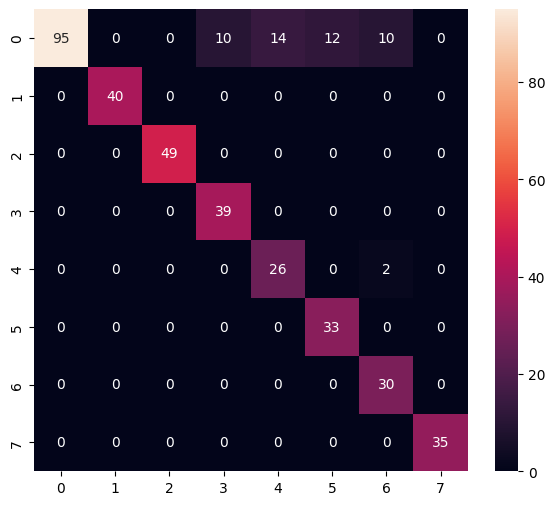

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.81       141
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        49
           3       0.80      1.00      0.89        39
           4       0.65      0.93      0.76        28
           5       0.73      1.00      0.85        33
           6       0.71      1.00      0.83        30
           7       1.00      1.00      1.00        35

    accuracy                           0.88       395
   macro avg       0.86      0.95      0.89       395
weighted avg       0.91      0.88      0.88       395



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    print(labels)
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [27]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\FYPJ\AI_Model\Venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jjalm\AppData\Local\Temp\tmp8hhwezjm\assets


INFO:tensorflow:Assets written to: C:\Users\jjalm\AppData\Local\Temp\tmp8hhwezjm\assets


6720

# Inference test

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
input_data = np.array([X_test[0]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

In [32]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.23237716e-02 2.01663405e-01 1.07740415e-02 5.86818089e-04
 1.30745771e-04 1.57692097e-02 5.34923165e-04 7.58217037e-01]
7


In [34]:
y_test[0]

7